References: https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/ 

In [138]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Regeression Analysis: Intro

Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). <br>

This technique is used for forecasting, time series modelling and finding the causal effect relationship between the variables. <br>

<strong> There are multiple benefits of using regression analysis. They are as follows: </strong>

- It indicates the  ***significant relationships*** between dependent variable and independent variable.
- It indicates the ***strength of impact*** of multiple independent variables_ on a dependent variable.

<strong> There are several types of regression models: </strong>
- Linear Regression
- Logistic Regression
- Polynomial Regression
- Stepwise Regression
- Ridge Regression
- Lasso Regression
- ElasticNet Regression


## In this example we are going to work with a simple data set of:
__40 observations of people brain related indicators to predict if it belongs to a Male or Female.__ <br>
Full Scale IQ (combines performance of the VCI, PRI, WMI, and PSI),<br> 
Verbal IQ (verbal comprehension and working memory),<br> 
Performance IQ (perceptual organization and processing speed) <br>
Magnetic Resonance Imagine is used to determine the brain size of individuals.

In [98]:
file_name = 'brain_size.csv'
path = os.getcwd() + '/../Datasets/' + file_name
data = pd.read_csv(path, na_values=".")#, sep=';', na_values=".")
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


In [99]:
data.Gender = data.Gender.astype('category')
data.Gender = data.Gender.cat.codes
male = data[data.Gender == 1]
female = data[data.Gender == 0]

male = male.fillna(male.mean())
female = female.fillna(female.mean())

data = pd.concat([male, female])
print(data.shape)
data.head()

(40, 7)


,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,1,140,150,124,166.444444,72.5,1001121
2,1,139,123,150,143.000000,73.3,1038437
3,1,133,129,128,172.000000,68.8,965353
8,1,89,93,84,134.000000,66.3,904858
9,1,133,114,147,172.000000,68.8,955466


### Getting known the data first

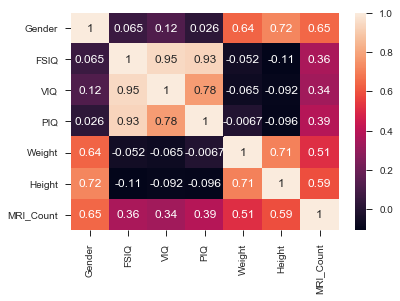

In [100]:
sns.heatmap(data.corr(), annot=True)

By looking at the correlation heatmap above we can observe high correlation between the Weight, Height, or MRI_Count vs. Gender <br>
Let's look at the features with low correlation first, to convince there is a little of correlation.

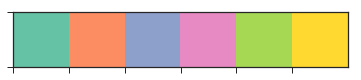

In [105]:
sns.set_palette('Set2')
current_palette = sns.color_palette()
sns.palplot(current_palette)

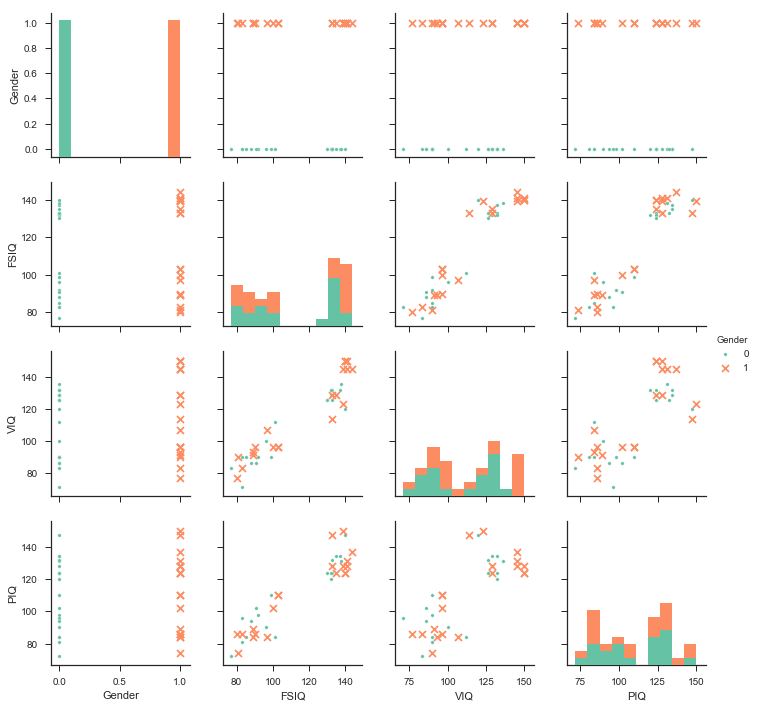

In [106]:
cols = ['Gender', 'FSIQ', 'VIQ', 'PIQ']
df = data[cols]

graph = sns.pairplot(df, markers=[".", 'x'],
                     hue='Gender')

On the first row of the above matrix we can little of difference between how data spread for the first class and for the second one.

Let's see if there is a pattern for the features with the higher Pearson correlation

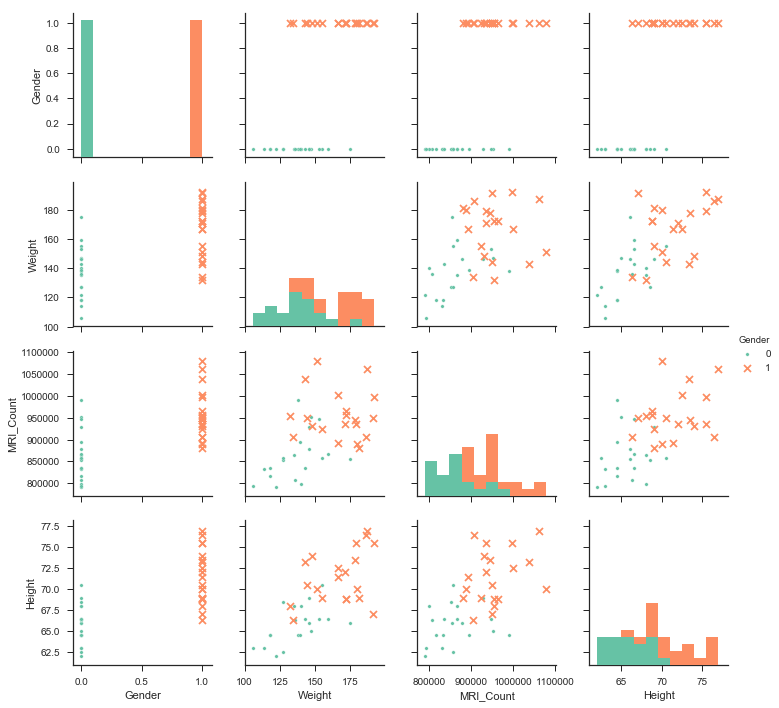

In [107]:
cols = ['Gender', 'Weight', 'MRI_Count', 'Height']
df = data[cols]

graph = sns.pairplot(df, markers=[".", 'x'],
                     hue='Gender')

From the above figures we can witness seperability using any two features out of MRI_Count, Height, or Weight. <br>
However to apply Linear Regression Model which predicts a value we should use any of the features against feature Gender.

### Let's apply Linear Regression Model

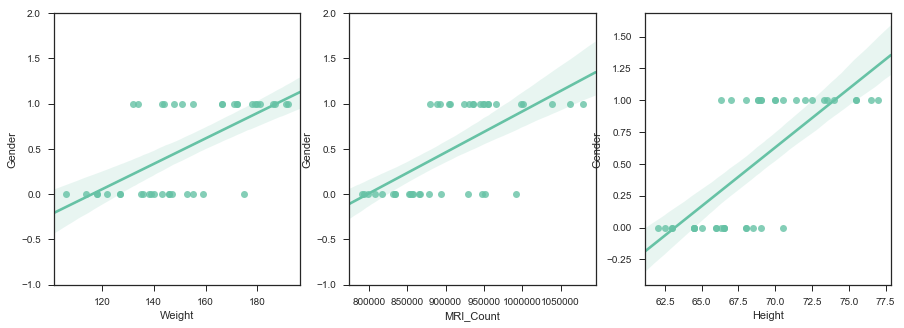

In [130]:
cols = ['Gender', 'Weight', 'MRI_Count', 'Height']
df = data[cols]

plt.figure(figsize=(15, 5))

for idx, col in enumerate(['Weight', 'MRI_Count', 'Height']):
    plt.ylim(-1,2)
    plt.subplot('13{}'.format(idx+1))
    sns.regplot(x=col, y="Gender", data=df)

On the above figures we can see a Linear Regression model behaviour. So we can use "above/below" thresholds for decision making.

Let's split the data into training and testing sets

In [276]:
cols = ['Gender', 'Weight', 'MRI_Count', 'Height']
df = data[cols]

accs = []

# lets take the average accuracy of 500 iterations
for i in range(500):
    train, test = train_test_split(df, test_size=0.2)
    x_train, y_train = train.iloc[:, 1:], train.iloc[:, 0]
    x_test, y_test = test.iloc[:, 1:], test.iloc[:, 0]

    # Use sklearn's Linear Regression model
    model = LinearRegression()
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    prediction = [1 if label >= 0.5 else 0 for label in prediction]
    acc = sum(prediction == y_test)/len(y_test)*100
    accs.append(acc)
res = sum(accs) / len(accs)
print("Average Accuracy: {}%".format(res))

Average Accuracy: 85.975%


### Let's Check if there is a difference using one, two, three features

In [279]:
df = data[['Gender', 'Weight', 'MRI_Count', 'Height']]
accs = {i: [] for i in range(7)}
scenarios = [['Weight', 'MRI_Count', 'Height'], 
                ['Weight', 'MRI_Count'], 
                ['Weight', 'Height'], 
                ['MRI_Count', 'Height'], 
                ['Weight'], 
                ['MRI_Count'], 
                ['Height']]

for i in range(500):
    train, test = train_test_split(df, test_size=0.2)
    for idx, cols in enumerate(scenarios):
        
        # the average accuracy of 100 iterations
        x_train, y_train = train[cols], train['Gender']
        x_test, y_test = test[cols], test['Gender']

        # Use sklearn's Linear Regression model
        model = LinearRegression()
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        prediction = [1 if label >= 0.5 else 0 for label in prediction]
        
        acc = sum(prediction == y_test)/len(y_test)*100
        accs[idx].append(acc)

In [295]:
accs1 = pd.DataFrame.from_dict(accs)
for idx, cols in enumerate(scenarios):
    print(idx, cols)
accs1.describe()

0 ['Weight', 'MRI_Count', 'Height']
1 ['Weight', 'MRI_Count']
2 ['Weight', 'Height']
3 ['MRI_Count', 'Height']
4 ['Weight']
5 ['MRI_Count']
6 ['Height']


,0,1,2,3,4,5,6
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,85.850000,80.975000,86.85000,85.500000,75.075000,77.450000,82.575000
std,11.040665,12.421573,11.22852,11.938805,13.966819,13.578153,12.995948
min,50.000000,37.500000,37.50000,50.000000,37.500000,37.500000,37.500000
25%,75.000000,75.000000,75.00000,75.000000,62.500000,75.000000,75.000000
50%,87.500000,81.250000,87.50000,87.500000,75.000000,75.000000,87.500000
75%,87.500000,87.500000,100.00000,100.000000,87.500000,87.500000,87.500000
max,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000


So we can see that the highest result shows Weight + Height features, with std 11.22

### Can we improve the results even higher

We can see that Weight ranges from min 106 to max 192, and Height from min 62 to max 77. <br>


Let's normalise the data (min max scaler)

In [262]:
df = (df - df.min()) / (df.max()-df.min())
df.describe()

,Gender,Weight,Height
count,40.00000,40.000000,40.000000
mean,0.50000,0.532817,0.439886
std,0.50637,0.268832,0.264652
min,0.00000,0.000000,0.000000
25%,0.00000,0.345930,0.266667
50%,0.50000,0.482558,0.416667
75%,1.00000,0.767442,0.582193
max,1.00000,1.000000,1.000000


In [307]:
df = data[['Gender', 'Weight', 'MRI_Count', 'Height']]
df = (df - df.min()) / (df.max()-df.min())
accs = {i: [] for i in range(7)}
scenarios = [['Weight', 'MRI_Count', 'Height'], 
                ['Weight', 'MRI_Count'], 
                ['Weight', 'Height'], 
                ['MRI_Count', 'Height'], 
                ['Weight'], 
                ['MRI_Count'], 
                ['Height']]

for i in range(500):
    train, test = train_test_split(df, test_size=0.2)
    for idx, cols in enumerate(scenarios):
        
        # the average accuracy of 100 iterations
        x_train, y_train = train[cols], train['Gender']
        x_test, y_test = test[cols], test['Gender']

        # Use sklearn's Linear Regression model
        model = LinearRegression()
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        prediction = [1 if label >= 0.5 else 0 for label in prediction]
        
        acc = sum(prediction == y_test)/len(y_test)*100
        accs[idx].append(acc)

In [308]:
accs2 = pd.DataFrame.from_dict(accs)
for idx, cols in enumerate(scenarios):
    print(idx, cols)
accs2.describe()

0 ['Weight', 'MRI_Count', 'Height']
1 ['Weight', 'MRI_Count']
2 ['Weight', 'Height']
3 ['MRI_Count', 'Height']
4 ['Weight']
5 ['MRI_Count']
6 ['Height']


,0,1,2,3,4,5,6
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,86.225000,81.950000,87.300000,85.075000,76.000000,78.025000,83.350000
std,11.867753,12.404848,11.655759,12.081963,13.462447,12.805852,13.739726
min,37.500000,25.000000,25.000000,50.000000,25.000000,37.500000,37.500000
25%,75.000000,75.000000,75.000000,75.000000,62.500000,75.000000,75.000000
50%,87.500000,87.500000,87.500000,87.500000,75.000000,75.000000,87.500000
75%,100.000000,87.500000,100.000000,100.000000,87.500000,87.500000,87.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


After normalisation the accuracy of the Linear Regression model not significantly changed